In [86]:
#Computational and Visualisation packages
library(qdap)
library(magrittr)
library(metricsgraphics)
library(tidytext)
library(tm)
library(readtext)
library(dplyr)
library(tidyr)
library(ggplot2)
library(ggthemes)
library(wordcloud)
library(radarchart)

# Suppress warnings
options(warn=-1)

In [87]:
text_df <- read.csv("../data/simple_sentiment.csv")
str(text_df)
sb_words <- read.csv("../data/sb_words.csv")
cat ("\n")
str(sb_words)
cat ("\n")
agamemnon_dataset <- read.csv("../data/agamemnon.csv")
str(agamemnon_dataset)

'data.frame':	8 obs. of  2 variables:
 $ person: Factor w/ 4 levels "Jonathan","Martijn",..: 3 1 2 4 3 1 2 4
 $ text  : Factor w/ 8 levels "DataCamp courses are the best",..: 1 3 6 8 2 7 5 4

'data.frame':	159 obs. of  3 variables:
 $ word: Factor w/ 159 levels "a","about","ad",..: 113 111 132 138 1 46 44 157 23 43 ...
 $ freq: int  1984423 1700564 1101899 588803 428598 388390 326464 322154 296673 292468 ...
 $ rank: int  1 2 3 4 5 6 7 8 9 10 ...

'data.frame':	8184 obs. of  3 variables:
 $ document: int  1 4 4 4 4 4 4 4 5 5 ...
 $ term    : Factor w/ 2835 levels "abate","abhorreth",..: 31 31 915 1639 1857 1959 2157 2382 56 57 ...
 $ count   : int  1 1 1 1 1 1 1 1 1 1 ...


In [88]:
#text_df %$% polarity(text)
datacamp_conversation <- text_df %$% polarity(text, person) #Polarity score group by person

cat ("\n Conversations : \n")
counts(datacamp_conversation)


 Conversations : 


person,wc,polarity,pos.words,neg.words,text.var
Nick,5,0.4472136,best,-,DataCamp courses are the best
Jonathan,5,0.4472136,like,-,I like talking to students
Martijn,7,-0.3779645,-,boring,Other online data science curricula are boring.
Nicole,4,0.0000000,-,-,What is for lunch?
Nick,6,0.4082483,great,-,DataCamp has lots of great content!
Jonathan,8,0.7071068,"passionate, excited",-,Students are passionate and are excited to learn
Martijn,12,-0.5773503,-,"hard , difficult",Other data science curriculum is hard to learn and difficult to understand
Nicole,7,0.3779645,good,-,I think the food here is good.


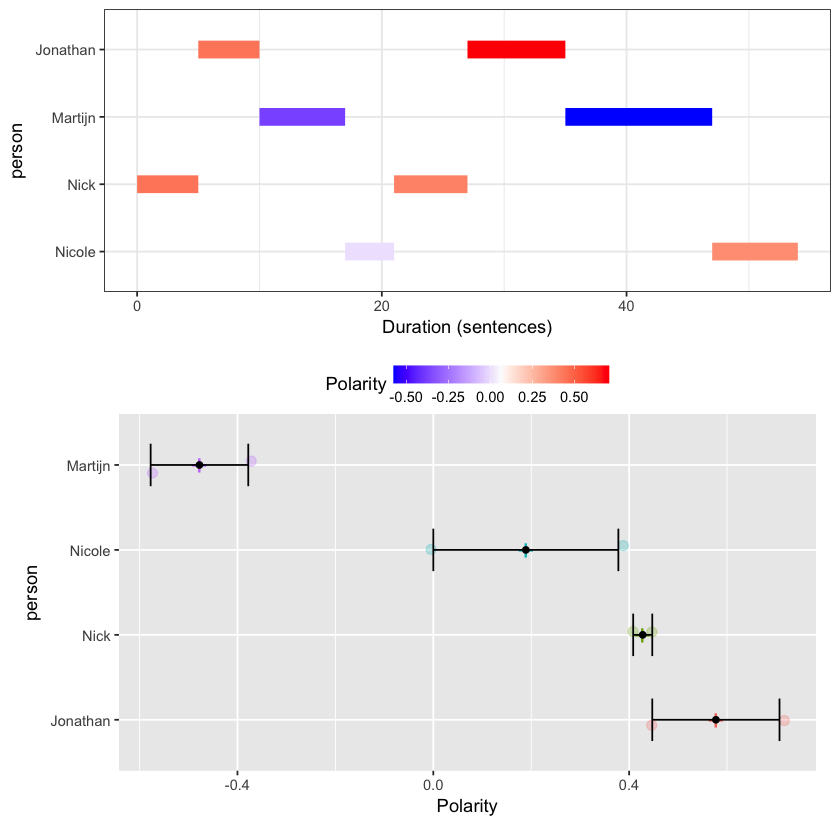

In [89]:
# Displaying the conversation polarity
plot(datacamp_conversation)

## Natural language analysis following  Zipf's law

In [90]:
sb_words$expectations <- sb_words %$% 
  {freq / rank}

head (sb_words)

word,freq,rank,expectations
sb,1984423,1,1984423.00
rt,1700564,2,850282.00
the,1101899,3,367299.67
to,588803,4,147200.75
a,428598,5,85719.60
for,388390,6,64731.67


In [91]:
# metrics plot
sb_plot <- mjs_plot(sb_words, x = rank, y = freq, show_rollover_text = FALSE)

sb_plot <- mjs_line(sb_plot)
sb_plot <- mjs_add_line(sb_plot, expectations)
sb_plot <- mjs_add_legend(sb_plot, legend = c("Frequency", "Expectation"))

# Displaying the plot
sb_plot

HTML widgets cannot be represented in plain text (need html)

# Polarity Analysis on the Words map

In [92]:
polarity_compuatation <- function(word){
    pos_score <- polarity(word)
    pos_counts <- counts(pos_score)
    n_good <- length(pos_counts$pos.words[[1]])
    n_words <- pos_counts$wc
    polarity_score <- n_good / sqrt(n_words)
    return (polarity_score)
}

In [93]:
text_df$polarity <- polarity_compuatation(text_df$text)

head (text_df, n=8)

person,text,polarity
Nick,DataCamp courses are the best,0.4472136
Jonathan,I like talking to students,0.4472136
Martijn,Other online data science curricula are boring.,0.3779645
Nicole,What is for lunch?,0.5000000
Nick,DataCamp has lots of great content!,0.4082483
Jonathan,Students are passionate and are excited to learn,0.3535534
Martijn,Other data science curriculum is hard to learn and difficult to understand,0.2886751
Nicole,I think the food here is good.,0.3779645


In [94]:
#Creating Document Term Matrix on Agamemnon dataset
agamemnon_dataset_corpus <- VCorpus(VectorSource(agamemnon_dataset))
ag_dtm <- DocumentTermMatrix(agamemnon_dataset_corpus)
#ag_dtm
ag_tidy <- tidy(ag_dtm)
# Exploring ag_tidy
ag_tidy[3000:3010, ]

document,term,count
2,goldchanger,1
2,golden,1
2,gone,9
2,good,23
2,goodbye,1
2,gore,2
2,gored,1
2,gorg\u00e3pis,1
2,gorge,1
2,got,2


In [95]:
ag_txt <- read.delim("../data/agamemnon_extract.txt", header = FALSE)
polarity(ag_txt)

# Extracting Bing lexicon
bing <- get_sentiments("bing")

# Merging bing and ag_tidy
ag_bing_words <- inner_join(ag_tidy, bing, by = c("term" = "word"))

# Getting counts by sentiment
ag_bing_words %>%
  count(sentiment)

all,wc,polarity,pos.words,neg.words,text.var
all,1,0,-,-,"c(57, 77, 121, 18, 196, 148, 93, 137, 95, 168, 139, 68, 83, 123, 44, 194, 33, 166, 149, 109, 66, 94, 101, 81, 110, 82, 161, 107, 111, 134, 63, 174, 160, 39, 192, 186, 86, 91, 115, 128, 58, 92, 14, 34, 84, 190, 120, 135, 98, 159, 103, 89, 70, 181, 118, 28, 124, 73, 90, 167, 155, 79, 169, 72, 147, 88, 203, 183, 182, 108, 176, 156, 170, 200, 119, 76, 71, 99, 202, 173, 45, 126, 127, 69, 151, 78, 114, 100, 191, 40, 42, 24, 106, 197, 16, 62, 122, 198, 25, 141, 153, 75, 97, 87, 150, 188, 113, 80, 55, 74, 157, 125, 163, 19, 143, 164, 144, 112, 138, 178, 136, 184, 105, 154, 189, 56, 52, 47, 30, 53, 187, 17, 129, 162, 185, 96, 199, 158, 130, 35, 171, 145, 104, 172, 102, 177, 142, 179, 201, 132, 85, 133, 152, 195, 117, 165, 64, 146, 131, 41, 140, 175, 180, 193, 116, 5, 65, 3, 43, 8, 36, 15, 20, 1, 6, 2, 67, 29, 31, 38, 12, 50, 61, 54, 21, 46, 4, 32, 11, 48, 13, 51, 9, 60, 37, 22, 7, 23, 10, 59, 26, 49, 27)"
all,total.sentences,total.words,ave.polarity,sd.polarity,stan.mean.polarity
all,1,1,0,NA,NA


sentiment,n
negative,320
positive,162


In [96]:
# Bringing in Moby Comedy Dataset
moby_comedy_dataset <- read.csv("../data/moby_comics.csv")
#m_dick_tidy <- tidy(moby_comedy_dataset)
moby_lex_words <- inner_join(moby_comedy_dataset, bing, by = c("term" = "word"))
str(moby_lex_words)

'data.frame':	2459 obs. of  4 variables:
 $ document : int  5 9 11 13 17 19 22 24 25 31 ...
 $ term     : chr  "precisely" "grim" "involuntarily" "strong" ...
 $ count    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ sentiment: chr  "positive" "negative" "negative" "positive" ...


In [97]:
moby_lex_words <- moby_lex_words %>%
  # Set index to numeric document
  mutate(index = as.numeric(document))

moby_count <- moby_lex_words %>%
  # Count by sentiment, index
  count(sentiment, index)

# Examine the counts
cat ("\n Moby count")
head(moby_count)

moby_spread <- moby_count %>%
  # Spread sentiments
  spread(sentiment, n, fill = 0)

# Review the spread data
cat ("\n Moby spread")
head (moby_spread)


 Moby count

sentiment,index,n
negative,9,1
negative,11,1
negative,22,1
negative,41,1
negative,42,2
negative,44,1



 Moby spread

index,negative,positive
5,0,1
9,1,0
11,1,0
13,0,1
17,0,1
19,0,1


In [98]:
str(moby_lex_words)
moby <- moby_lex_words[, c("document", "term", "count")]

'data.frame':	2459 obs. of  5 variables:
 $ document : int  5 9 11 13 17 19 22 24 25 31 ...
 $ term     : chr  "precisely" "grim" "involuntarily" "strong" ...
 $ count    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ sentiment: chr  "positive" "negative" "negative" "positive" ...
 $ index    : num  5 9 11 13 17 19 22 24 25 31 ...


# Visualising chronological polarity

`geom_smooth()` using method = 'gam'


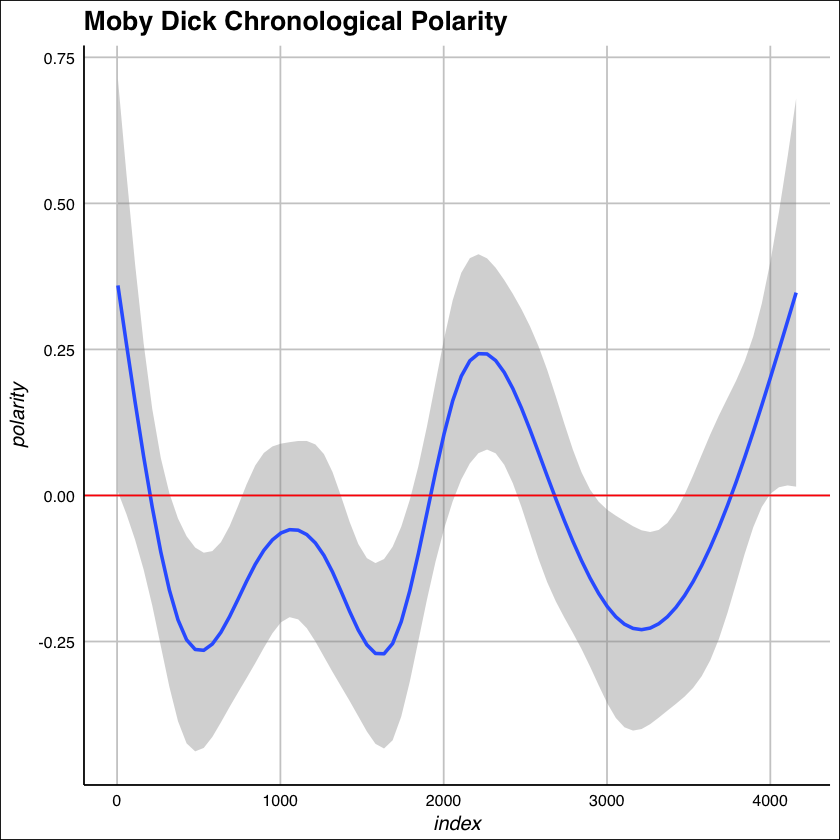

In [99]:
moby_lex_words <- moby_lex_words[, c("term", "count", "index")]

moby_polarity <- moby_lex_words %>%
  inner_join(bing, by = c("term" = "word")) %>%
  count(sentiment, index) %>% 
  spread(sentiment, n, fill = 0) %>%
  mutate(
      polarity = positive - negative, 
      line_number = row_number()
  )

# Plot polarity vs. index
ggplot(moby_polarity, aes(index, polarity)) + 
  geom_smooth()  +
  geom_hline(yintercept = 0, color = "red") +
  ggtitle("Moby Dick Chronological Polarity") +
  theme_gdocs()

# Word Impact & Frequency Analysis

In [100]:
# Inner join without renamed columns
moby_sents <- inner_join(moby, bing, by = c("term" = "word"))

# Tidy sentiment calculation
moby_tidy_sentiment <- moby_sents %>% 
  count(term, sentiment, wt = count) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(polarity = positive - negative)

# Reviewing the tidy sentiment
head(moby_tidy_sentiment)
cat ("\n")
tail(moby_tidy_sentiment)

term,negative,positive,polarity
abominable,2,0,-2
abominate,1,0,-1
abruptly,1,0,-1
absence,1,0,-1
absurd,1,0,-1
abundant,0,1,1


term,negative,positive,polarity
wounds,1,0,-1
wrath,3,0,-3
wretched,4,0,-4
wrinkled,4,0,-4
wrinkles,2,0,-2
wrong,3,0,-3


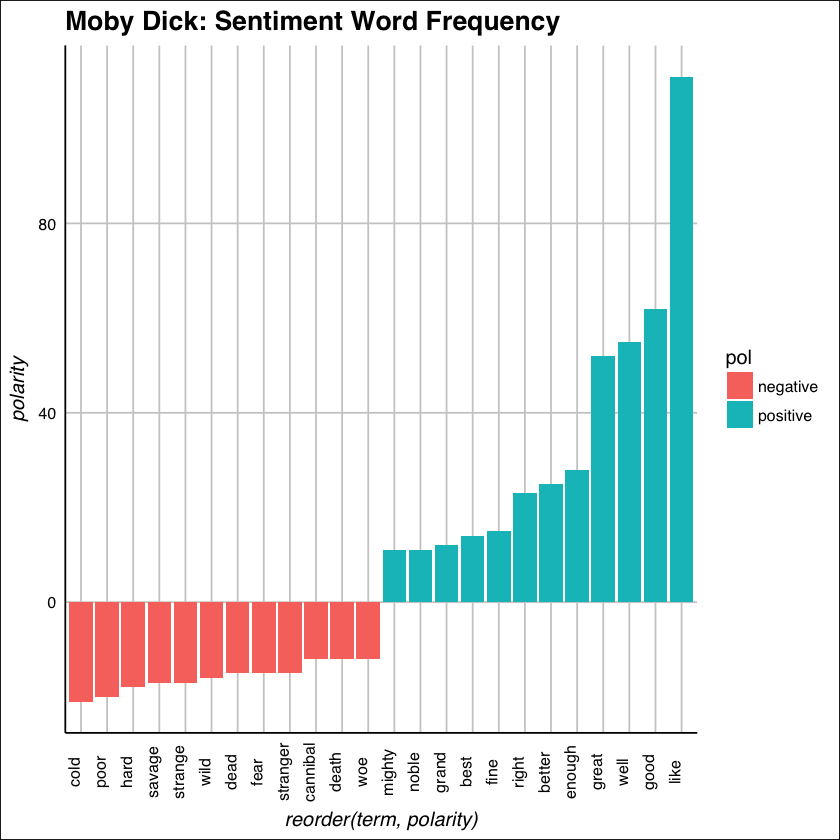

In [101]:
# Limiting to absolute polarity greater than 10
moby_tidy_subset <- moby_tidy_sentiment %>% 
  filter(abs(polarity) > 10)

# Adding polarity
moby_tidy_pol <- moby_tidy_subset %>% 
  mutate(
    pol = ifelse(polarity > 0, "positive", "negative")
  )

# Diplay
ggplot(moby_tidy_pol, aes(reorder(term, polarity), polarity, fill = pol)) +
  geom_bar(stat = "identity") + 
  ggtitle("Moby Dick: Sentiment Word Frequency") + 
  theme_gdocs() +
  theme(axis.text.x = element_text(angle = 90, vjust = -0.1))

# Plutchik's 8 emotions visualisation using NRC dataset

In [102]:
nrc <- read.csv("../data/nrc_lexicon_dataset.csv")
oz <- read.csv("../data/wizard_oz_dataset.csv")

str (nrc)
cat ("\n")
str (oz)

'data.frame':	13901 obs. of  2 variables:
 $ word     : Factor w/ 6468 levels "TRUE","abacus",..: 2 3 3 3 4 4 4 4 5 5 ...
 $ sentiment: Factor w/ 10 levels "anger","anticipation",..: 10 4 6 8 1 4 6 8 1 4 ...

'data.frame':	19007 obs. of  3 variables:
 $ document: int  1 1 1 6 6 10 12 13 13 14 ...
 $ term    : Factor w/ 2883 levels "FALSE","TRUE",..: 2495 2820 2831 168 976 514 1291 592 2495 533 ...
 $ count   : int  1 1 1 1 1 1 1 1 1 1 ...


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	8 obs. of  2 variables:
 $ sentiment  : Factor w/ 10 levels "anger","anticipation",..: 1 2 3 4 5 8 9 10
 $ total_count: int  609 854 486 1255 868 609 481 925


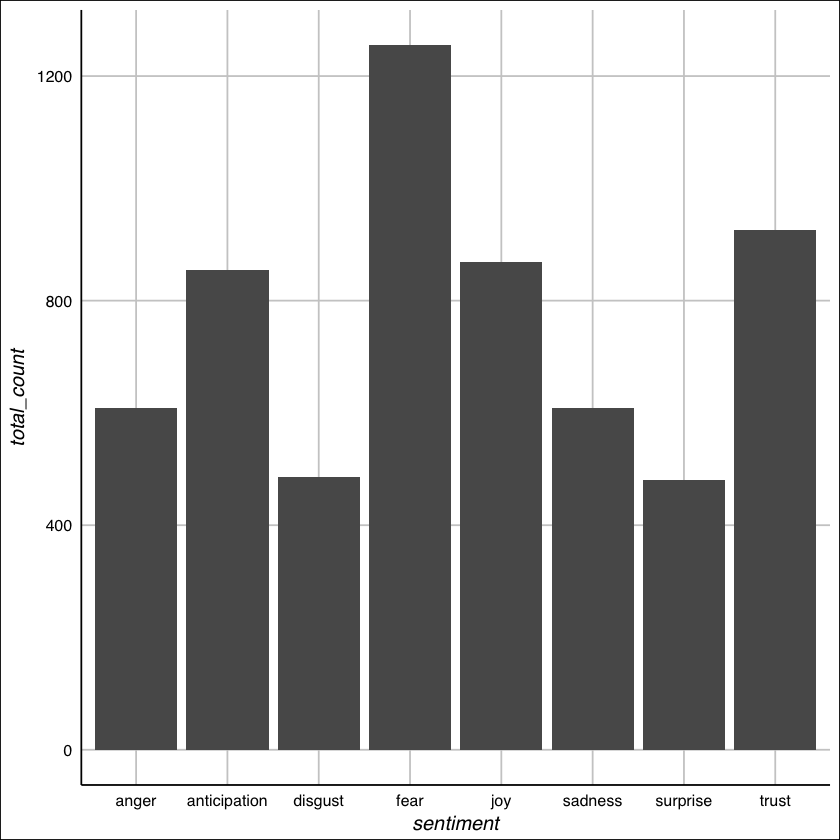

In [103]:
oz_nrc <- inner_join(oz, nrc, by = c("term" = "word"))

#
oz_plutchik <- oz_nrc %>% 
  filter(!sentiment %in% c("positive", "negative")) %>%
  group_by(sentiment) %>%
  summarize(total_count = sum(count))

str(oz_plutchik)
# Plotting the counts
ggplot(oz_plutchik, aes(x = sentiment, y = total_count)) +
  theme_gdocs() +
  geom_col()

## Building Comparison cloud

In [104]:
pol_subsections <- function(df) {
  x.pos <- subset(df$text, df$polarity > 0)
  x.neg <- subset(df$text, df$polarity < 0)
  x.pos <- paste(x.pos, collapse = " ")
  x.neg <- paste(x.neg, collapse = " ")
  all.terms <- c(x.pos, x.neg)
  return(all.terms)
}

In [105]:
# TODO : Optimization
#oz_pol <- polarity(oz)
#oz_df <- oz_pol$all %>%
#  select(text = text.var, polarity = polarity)
#
#all_terms <- pol_subsections(oz_df)
#all_corpus <- all_terms %>%
#  VectorSource() %>% 
#  VCorpus()
#all_tdm <- TermDocumentMatrix(
#  all_corpus,
#  control = list(
#    removePunctuation = TRUE,
#    stopwords = stopwords(kind = "en")
#  )
#) %>%
#  as.matrix() %>%
#  set_colnames(c("positive", "negative"))
#
#all_tdm
#
## Comparison cloud
#comparison.cloud(
#  all_tdm,
#  max.words = 50,
#  colors = c("darkgreen", "darkred")
#)

In [106]:
str(nrc)

'data.frame':	13901 obs. of  2 variables:
 $ word     : Factor w/ 6468 levels "TRUE","abacus",..: 2 3 3 3 4 4 4 4 5 5 ...
 $ sentiment: Factor w/ 10 levels "anger","anticipation",..: 10 4 6 8 1 4 6 8 1 4 ...


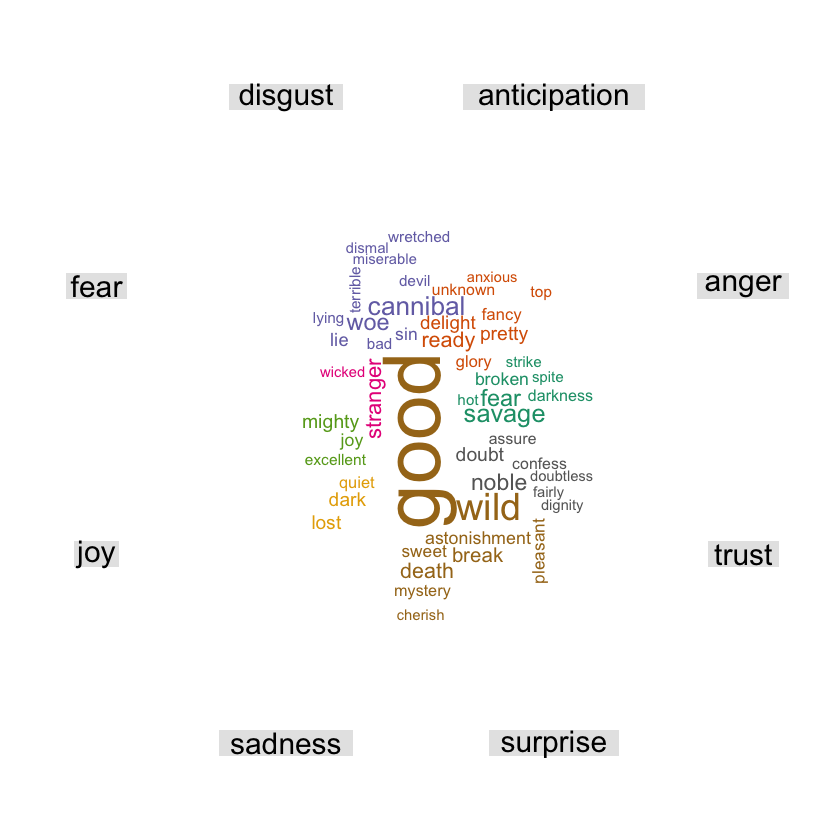

In [107]:
moby_sentiment <- inner_join(moby, nrc, by=c('term'='word'))

moby_pos_neg <- moby_sentiment %>%
  filter(!grepl("positive|negative", sentiment))

# group by sentiment
moby_tidy <- moby_pos_neg %>% 
  count(sentiment, term = term) %>% 
  spread(sentiment, n, fill = 0) %>%
  as.data.frame()
  
rownames(moby_tidy) <- moby_tidy[, 1]
moby_tidy[, 1] <- NULL

#head(moby_tidy)

# Comparison cloud
comparison.cloud(moby_tidy, max.words = 50, title.size = 1.5)

## Radar Chart

In [108]:
str(moby)
str(nrc)

'data.frame':	2459 obs. of  3 variables:
 $ document: int  5 9 11 13 17 19 22 24 25 31 ...
 $ term    : chr  "precisely" "grim" "involuntarily" "strong" ...
 $ count   : int  1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	13901 obs. of  2 variables:
 $ word     : Factor w/ 6468 levels "TRUE","abacus",..: 2 3 3 3 4 4 4 4 5 5 ...
 $ sentiment: Factor w/ 10 levels "anger","anticipation",..: 10 4 6 8 1 4 6 8 1 4 ...


In [109]:
books_sents <- inner_join(moby, nrc, by=c('term'='word'))

books_pos_neg <- books_sents %>%
  filter(!grepl("positive|negative", sentiment))

# Tidy tally
books_tally <- books_pos_neg %>%
  group_by(sentiment) %>%
  tally()

# radar chart
chartJSRadar(books_tally)

HTML widgets cannot be represented in plain text (need html)